In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graspy
from tqdm import tqdm
import networkx as nx
%matplotlib inline

In [2]:
male = np.array(pd.read_csv('male_chem_A_full_undirected.csv', header=None).values)
herm = np.array(pd.read_csv('herm_chem_A_full_undirected.csv', header=None).values)

In [3]:
print('male:',male.shape)
print('herm:',herm.shape)

male: (575, 575)
herm: (453, 453)


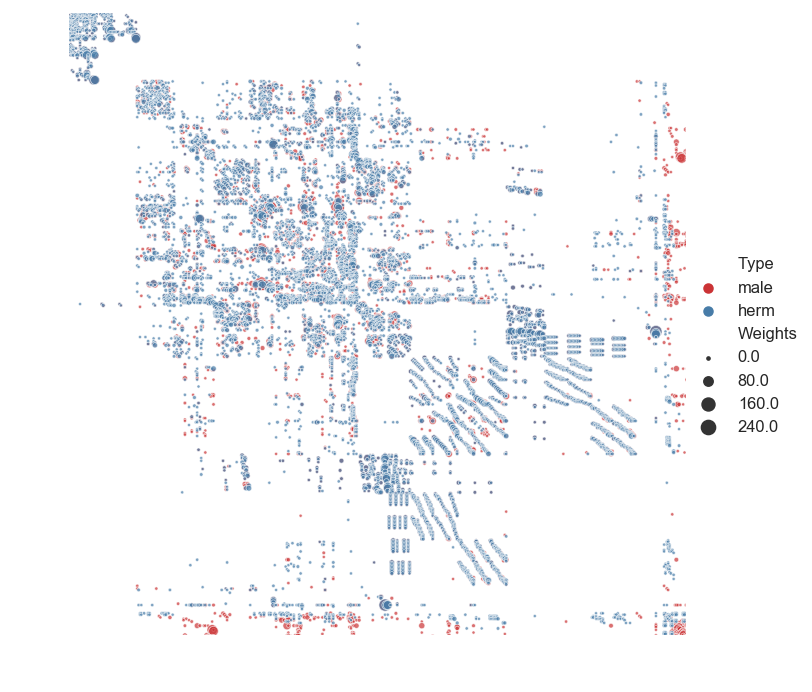

In [4]:
graspy.plot.gridplot([male,herm], ['male','herm'])

In [5]:
nonpar = graspy.inference.NonparametricTest(bandwidth=0.5)
nonpar.fit(male, herm)

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:108: UserWarning: Input graph is not fully connected. Results may not             be optimal. You can compute the largest connected component by             using ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:108: UserWarning: Input graph is not fully connected. Results may not             be optimal. You can compute the largest connected component by             using ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)


0.0

In [54]:
from graspy.simulations import sbm
A = sbm([50,50],np.array([[.9,.1],[.1,.9]]))
A2 = sbm([50,50],np.array([[.9,.1],[.1,.9]]))
B = sbm([50,50],np.array([[.9,.7],[.7,.9]]))

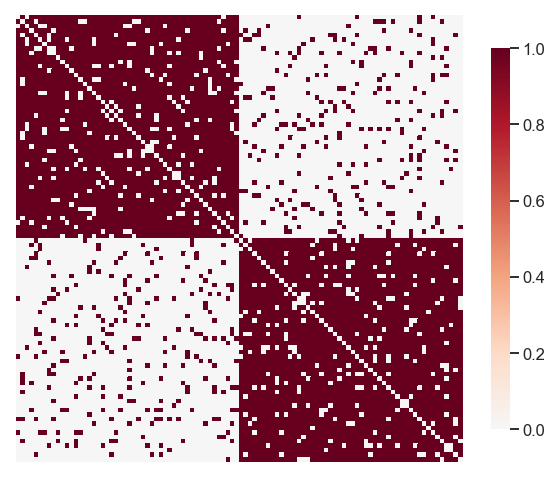

In [55]:
graspy.plot.heatmap(A)

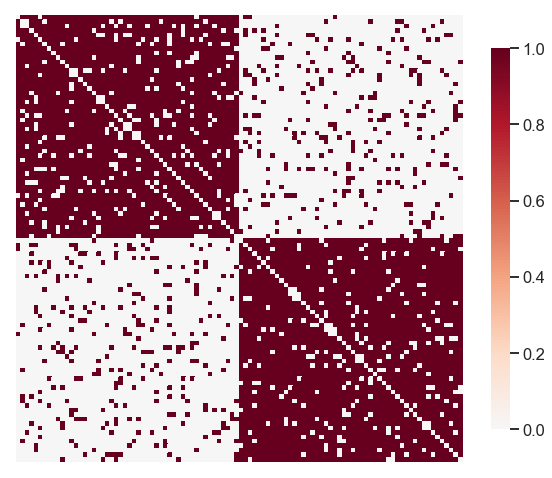

In [56]:
graspy.plot.heatmap(A2)

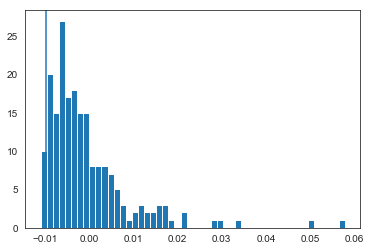

0.95


In [57]:
nonpar = graspy.inference.NonparametricTest()
p = nonpar.fit(A, A2)
plt.hist(nonpar.null_distribution_, 50)
plt.axvline(nonpar.sample_T_statistic_)
plt.show()
print(p)

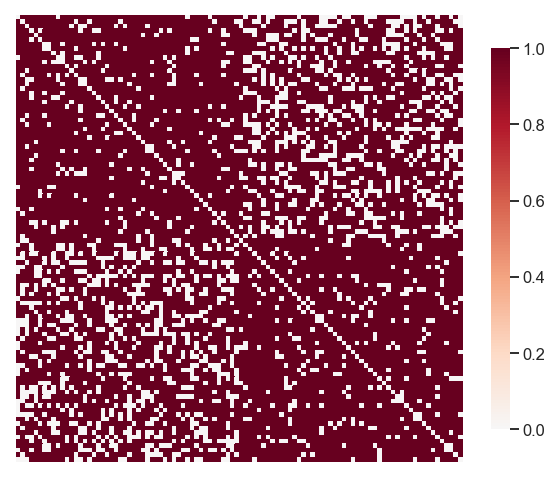

In [58]:
graspy.plot.heatmap(B)

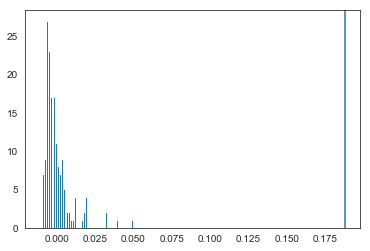

0.0


In [59]:
nonpar = graspy.inference.NonparametricTest()
p2 = nonpar.fit(A, B)
plt.hist(nonpar.null_distribution_, 50)
plt.axvline(nonpar.sample_T_statistic_)
plt.show()
print(p2)

In [39]:
def gen_data(n, eps):
    pi = [0.4, 0.6]
    sizes = [int(pi[0]*n), int(pi[1]*n)]
    
    probsA = np.array([
        [0.5, 0.2],
        [0.2, 0.5]])
    
    probsB = np.array([
        [0.5 + eps, 0.2],
        [0.2, 0.5 + eps]])
    A1 = sbm(n=sizes, p=probsA)
    A2 = sbm(n=sizes, p=probsB)
    return A1, A2

def estimated_power(n, eps, iters):
    A1, A2 = gen_data(n, eps)
    npt = graspy.inference.NonparametricTest()
    npt.fit(A1, A2)
    sorted_ = np.sort(npt.null_distribution_)
    rej_ind = int(np.ceil(((1 - 0.05)*200))) #200 is n_bootstraps, 0.05 is alpha
    critical_value = sorted_[rej_ind]
    
    rejections = 0
    for i in range(iters):
        A, B = gen_data(n, eps)
        npt_2 = graspy.inference.NonparametricTest(n_bootstraps=1)
        npt_2.fit(A,B)
        U = npt_2.sample_T_statistic_
        if U > critical_value:
            rejections += 1
    return rejections/iters

def monte_carlo(ns, eps, iters = 1000):
    powers = np.zeros(shape = (len(ns),len(eps)))
    for i in tqdm(range(len(ns))):
        for j in tqdm(range(len(eps))):
            powers[i,j] = np.array(estimated_power(ns[i], eps[j], iters))
    return powers

In [40]:
# monte_ns = [100, 200, 500, 1000]
monte_ns = [100, 200]
monte_eps = [0.02, 0.05, 0.1]
power_table = monte_carlo(ns = monte_ns, eps = monte_eps)

100%|██████████| 2/2 [10:13<00:00, 247.63s/it]


In [42]:
print("Paper results")
print(np.array([[.06,.09,.27],[.09,.17,.83],[.1,.43,1],[.14,1,1]]))
print("Sim results")
print(power_table)

Paper results
[[0.06 0.09 0.27]
 [0.09 0.17 0.83]
 [0.1  0.43 1.  ]
 [0.14 1.   1.  ]]
Sim results
[[0.    0.    0.   ]
 [0.    0.    0.364]]


In [60]:
# monte_ns = [100, 200, 500, 1000]
monte_ns = [100, 200, 500, 1000]
monte_eps = [0.02, 0.05, 0.1]
power_table = monte_carlo(ns = monte_ns, eps = monte_eps)



  0%|          | 0/4 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:51<01:43, 51.69s/it]


 67%|██████▋   | 2/3 [01:43<00:51, 51.77s/it]


100%|██████████| 3/3 [02:36<00:00, 52.20s/it]

 25%|██▌       | 1/4 [02:36<07:50, 156.86s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [02:27<04:55, 147.85s/it]


 67%|██████▋   | 2/3 [05:08<02:31, 151.55s/it]


100%|██████████| 3/3 [07:48<00:00, 154.27s/it]

 50%|█████     | 2/4 [10:25<08:20, 250.40s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [12:26<24:52, 746.23s/it]


 67%|██████▋   | 2/3 [26:14<12:50, 770.89s/it]


100%|██████████| 3/3 [39:34<00:00, 779.57s/it]

 75%|███████▌  | 3/4 [50:00<14:47, 887.63s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [2:01:17<4:02:35, 7277.82s/it]


 67%|██████▋   | 2/3 [3:12:20<1:46:13, 6373.35s/it]


100%|██████████| 3/3 [4:28:23<00:00, 5830.31s/it]  

100%|██████████| 4/4 [5:18:23<00:00, 5452.53s/it]

In [66]:
#run minhs code, see what happens
# DO STUFFS ON RDPGs, not SBMs
#power curve going to 1 as n grows
#power curve staying at alpha
print("Paper results")
print(np.array([[.06,.09,.27],[.09,.17,.83],[.1,.43,1],[.14,1,1]]))
print("Sim results")
print(power_table)

Paper results
[[0.06 0.09 0.27]
 [0.09 0.17 0.83]
 [0.1  0.43 1.  ]
 [0.14 1.   1.  ]]
Sim results
[[0.    0.    0.   ]
 [0.    0.    0.659]
 [0.    0.038 1.   ]
 [0.    1.    1.   ]]
